<a href="https://colab.research.google.com/github/tohnperfect/DPDM2021/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

### Generate Data 

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

### Explore data

In [3]:
X.shape

(500, 2)

In [4]:
y[:10]

array([0, 2, 2, 2, 0, 1, 0, 2, 0, 1])

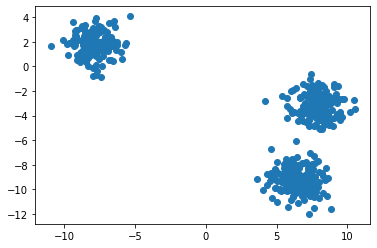

In [8]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

### Clustering

#### Import

In [5]:
from sklearn.cluster import KMeans

#### Define

In [6]:
kmeans = KMeans(n_clusters=2, random_state=6)

#### Fit-Predict

In [9]:
y_clust = kmeans.fit_predict(X)

In [10]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

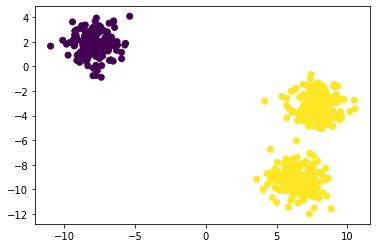

In [11]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

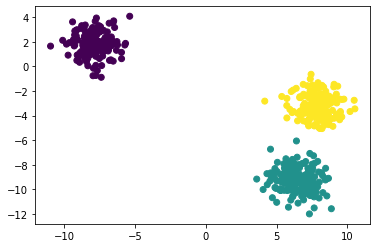

In [12]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

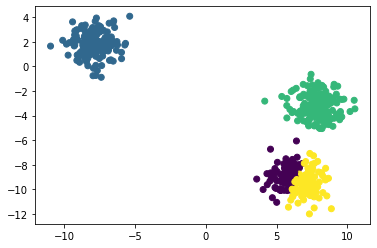

In [13]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

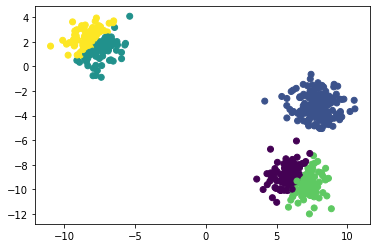

In [14]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

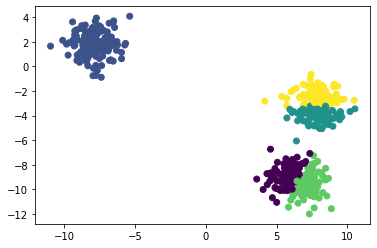

In [15]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## Example Application (Color Quantization)

In [16]:
import cv2
import os

In [17]:
img = cv2.imread('/content/Screen Shot 2564-10-29 at 18.24.16.png')

In [18]:
img.shape

(608, 921, 3)

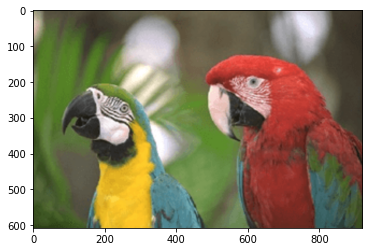

In [19]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [20]:
import numpy as np

In [24]:
allcolor = np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0)
allcolor.shape

(44272, 3)

### จัดกลุ่มสีให้เหลือ 8 สี

In [22]:
myquantize = KMeans(n_clusters=8,random_state=6) #kmeans define

แปลงข้อมูลให้อยู่ในรูป row-column

นับจำนวน pixel ในภาพ

In [23]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(559968, 3)

In [25]:
final_color = myquantize.fit_predict(allcolor) #kmeans fit-predict

### ใช้ centroid เป็นตัวแทนของสี

In [26]:
centroid = myquantize.cluster_centers_

In [27]:
centroid

array([[182.89548387, 165.38156682, 154.8956682 ],
       [100.87018217, 113.21917546,  75.19185043],
       [213.35176185, 177.30680437,  49.70109356],
       [221.7444795 , 207.91943703, 204.67459355],
       [ 71.39628743,  73.37053892,  53.43892216],
       [126.22046036, 141.04654731, 118.36393862],
       [131.54153005,  60.57540984,  52.0795082 ],
       [190.14148936,  86.81347518,  78.24184397]])

แทนสีคืนลงไป

In [28]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

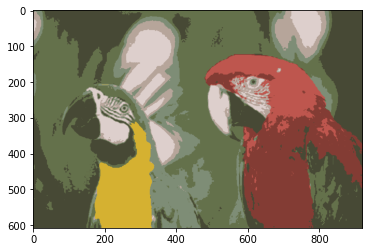

In [29]:
plt.imshow(new_img/255)

In [ ]:
plt.imsave('img.jpg',new_img/255)

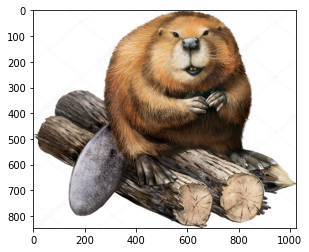

In [ ]:
plt.imshow(RGB_img)

# Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation